In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

# Gender Classification

In [2]:
data=pd.read_csv('./gender_classification_v7.csv')

In [3]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


# An explanation of each feature
* long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
* forehead_width_cm - This column is in CM's. This is the width of the forehead.
* forehead_height_cm - This is the height of the forehead and it's in Cm's.
* nose_wide - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
* nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
* lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".	
* distance_nose_to_lip_long	gender - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
data.shape

(5001, 8)

In [6]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

#### We can see that our data is clean from Nulls, Later we will also replace the "gender" column to numeric data, Then we can work with numeric data only.

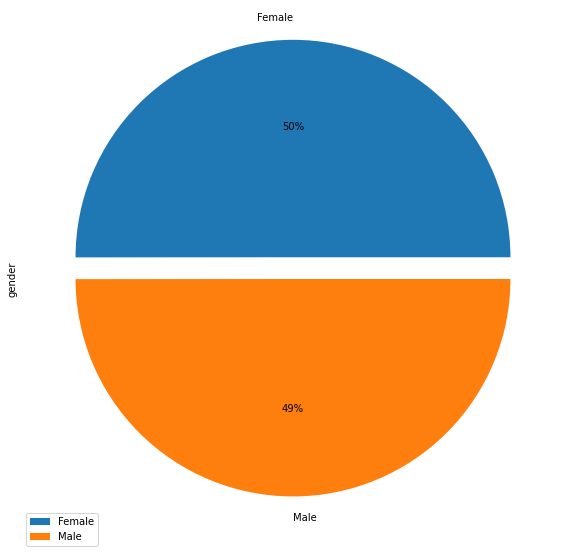

In [8]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['gender'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Pearson Correlation between different fearures')

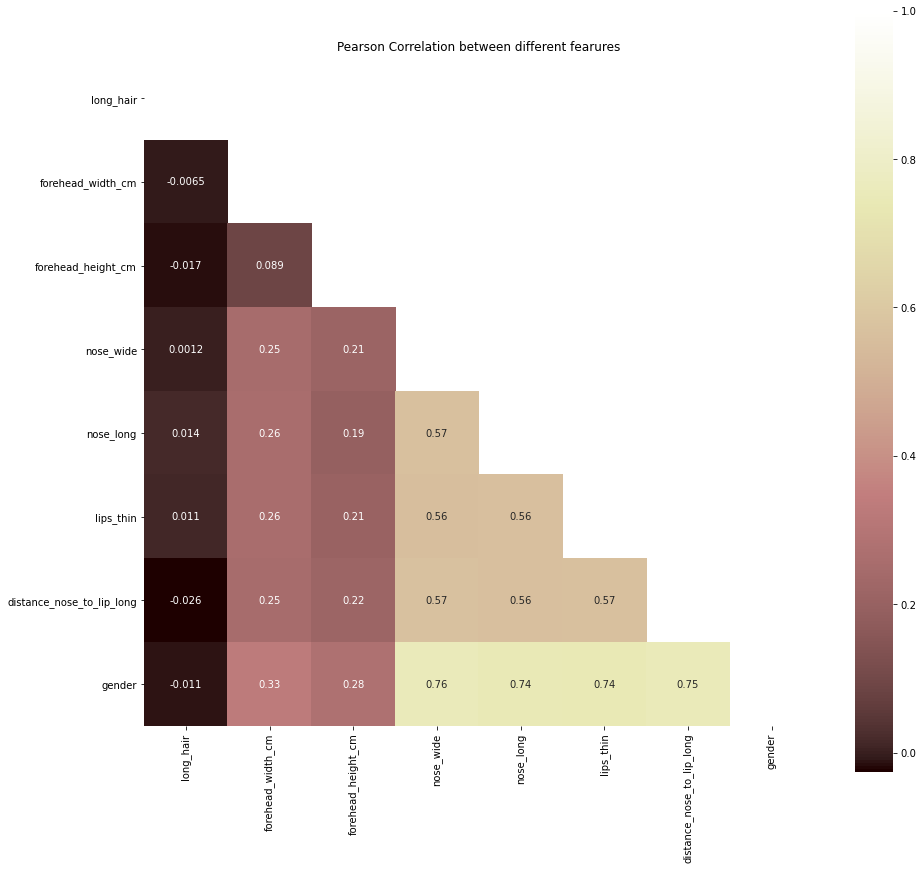

In [9]:
datacorr=data.copy()
#Changing to numeric data
datacorr['gender'] = datacorr['gender'].str.replace('Male', '1').str.replace('Female', '0').astype('float')
corr = datacorr.corr() #Finding a couple correlation in the data
mask = np.zeros_like(corr) #Make them all 0
mask[np.tril_indices_from(mask)] = True #Triangle of values 1
f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap="pink" ,mask=mask.T)

plt.title('Pearson Correlation between different fearures')

Text(0.5, 1.0, 'width vs height of forehead')

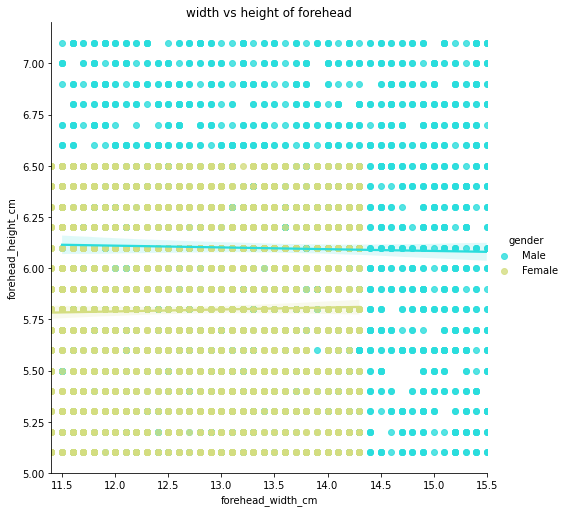

In [10]:
sns.lmplot(x="forehead_width_cm", y="forehead_height_cm", hue="gender", data=data, palette = 'rainbow', height = 7)
ax = plt.gca()
ax.set_title("width vs height of forehead")

### This graph describe the longer and wider the forehead, the more likely it is a man

Text(0.5, 1.0, 'lips thin vs distance from nose to lip long')

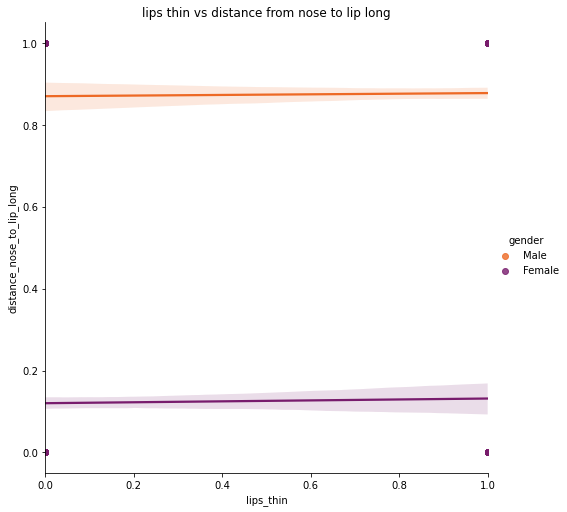

In [11]:
sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=data, palette = 'inferno_r', height = 7)
ax = plt.gca()
ax.set_title("lips thin vs distance from nose to lip long")

### We can conclude from the graph above that the division is really equal - men have thinner lips and a greater distance from the lip to the chin.

Text(0.5, 1.0, 'wide vs long of nose')

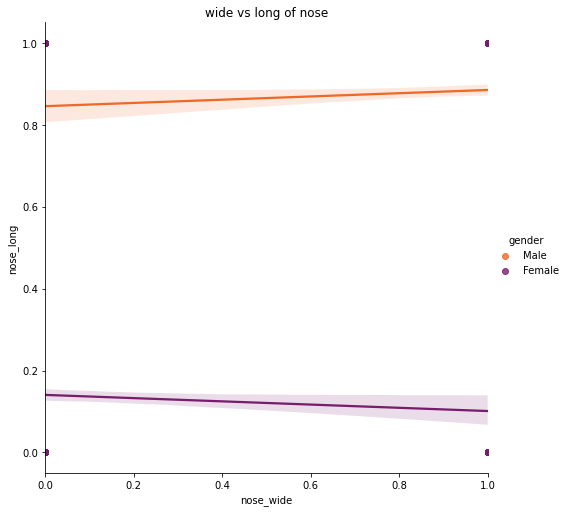

In [12]:
sns.lmplot(x="nose_wide", y="nose_long", hue="gender", data=data, palette = 'inferno_r', height = 7)
ax = plt.gca()
ax.set_title("wide vs long of nose")

### Here also the division is really equal - men have longer and wider nose then women.

# Modeling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [4]:
#changing the column 'gender' to numeric data
data['gender'] = data['gender'].str.replace('Male', '1').str.replace('Female', '0').astype('float')

In [5]:
y = data.gender
X = data.drop(['gender'], axis = 1) #Gender is the purpose of the prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =np.random.RandomState(0))

## Model selection
Our goal is to train the model so that it can identify whether it is a man or a woman.
For this we will use two models: KNN and Logistic-Regression.

## K Nearest Neighbours 

In [16]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores

[0.9630369630369631,
 0.958041958041958,
 0.9630369630369631,
 0.961038961038961,
 0.965034965034965,
 0.9630369630369631,
 0.962037962037962,
 0.9630369630369631,
 0.964035964035964,
 0.965034965034965,
 0.967032967032967,
 0.9690309690309691,
 0.968031968031968,
 0.968031968031968,
 0.9660339660339661,
 0.967032967032967,
 0.967032967032967,
 0.967032967032967,
 0.965034965034965,
 0.967032967032967,
 0.965034965034965,
 0.965034965034965,
 0.9660339660339661,
 0.965034965034965,
 0.964035964035964]

Text(0, 0.5, 'Testing Accuracy')

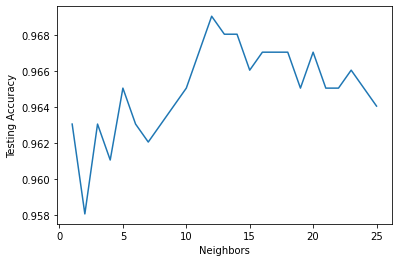

In [17]:
# the connection between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Neighbors')
plt.ylabel('Testing Accuracy')

### From the above graph it can be concluded that the ideal k is K=12.

In [18]:
#cross validation
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score)

[0.95808383 0.968      0.972      0.966      0.98       0.986
 0.976      0.97       0.982      0.976     ]


In [19]:
print(score.mean())

0.973408383233533


Text(0.5, 1.0, 'Confiusion Matrix')

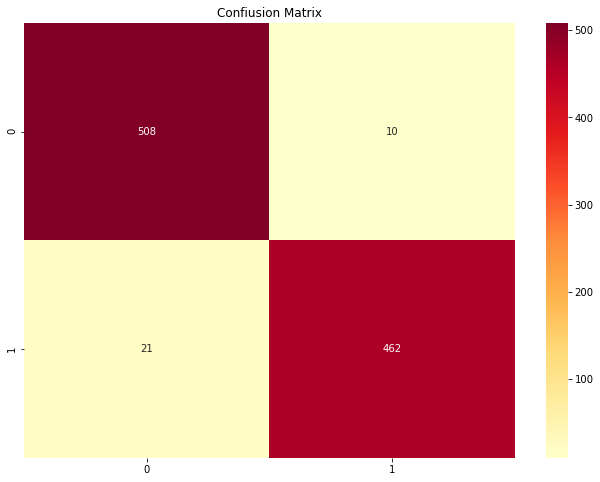

In [6]:
# instantiate the model with the best known parameters
knn=KNeighborsClassifier(n_neighbors=12)
# train the model with X and y (not X_train and y_train)
knn.fit(X_train, y_train)
# make a prediction for an out-of-sample observation
pred=knn.predict(X_test)
con=confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(con, annot=True, fmt='g', cmap="YlOrRd")
plt.title('Confiusion Matrix')

In [7]:
metrics.accuracy_score(y_test, pred)

0.9690309690309691

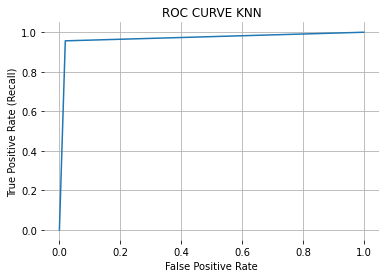

The score for the ROC Curve is: 96.89999999999999%


In [22]:
fpr, tpr, _= roc_curve(y_test, pred)
auc= roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Logistic Regression

In [23]:
reglog=LogisticRegression()
reglog=LogisticRegression(solver='liblinear',C=0.1,penalty='l2')
# fit the model with data
reglog.fit(X_train,y_train)
# predict the response values for the observations in X
reglog.predict(X_test)

array([0., 1., 1., ..., 0., 1., 0.])

In [24]:
# check how many predictions were generated
y_pred = reglog.predict(X_test)
len(y_pred)

1001

In [25]:
#check accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.939060939060939

In [26]:
mypred=reglog.predict(X_train)
metrics.accuracy_score(y_train, mypred)

0.953

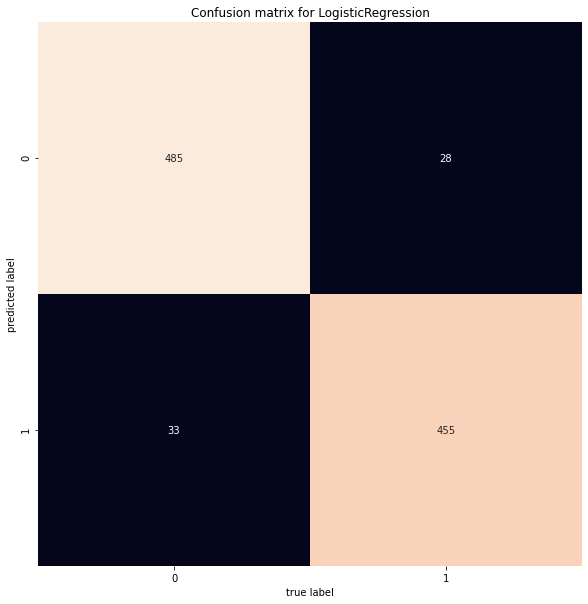

In [27]:
plt.figure(1, figsize= (10,10))
plt.title("Confusion matrix for "+'LogisticRegression')
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close()     

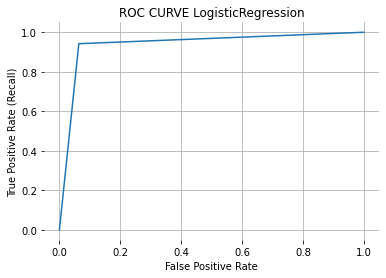

The score for the ROC Curve is: 93.89999999999999%


In [28]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

### Up to here the notebook from the previous semester
### And in conclusion:

# KNN- 96.9% of accuracy 
# Logistic Regression- 96.39% of accuracy

## Im going to use Ensemble Learning - try to improve the accuracy:

In [17]:
#Random Forest
# We will examine what the best parameters are with grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,20,30,40,50,60,70,80,90,100,110],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,150, 200, 250, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
#Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 1944 candidates, totalling 5832 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 5832 out of 5832 | elapsed: 17.3min finished


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 300}

In [18]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rnd=RandomForestClassifier(max_depth=5, max_features=2,n_estimators=300, min_samples_leaf=4, min_samples_split=12, )
rnd.fit(X_train,y_train)
y_pred=rnd.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.968031968031968

In [9]:
#voting
voting_clf=VotingClassifier(estimators=[('rf',rnd),('kn',knn)],voting='soft')
voting_clf.fit(X_train,y_train)
y_pred= voting_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.967032967032967

In [13]:
# Bagging
# We will examine what the best parameters are with grid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {
    'max_samples': [1,2,3],
    'max_features': [1,2,3],
    'random_state': [0,1,2,3,4,5],
    'n_jobs': [0,1,2,3,4,5,8,10,12],
    'n_estimators': [2,3,4,5,10,15,20,25,30,50,10,150,200]
}
# Create a based model
bag = BaggingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = bag, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
#Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 6318 candidates, totalling 18954 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 3124 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 4146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5837 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6896 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 8692 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 11016 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 13596 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 16568 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 18917 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 18954 out of 18954 | elapsed:  7.2min finished


{'max_features': 1,
 'max_samples': 3,
 'n_estimators': 200,
 'n_jobs': 1,
 'random_state': 4}

In [16]:
bag_clf =BaggingClassifier(n_estimators=200, max_features= 1, max_samples= 3, n_jobs= 1, random_state=4)
bag_clf.fit(X_train, y_train)
y_pred= bag_clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       518
         1.0       0.99      0.91      0.94       483

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001

Accuracy = 0.949050949050949


In [10]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier()
ds.fit(X_train, y_train)
y_pred= ds.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9590409590409591

In [117]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=0, learning_rate=1)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.967032967032967

In [118]:
#stacking
from sklearn.ensemble import StackingClassifier
stacking_clf=StackingClassifier(estimators=[('rf',rnd),('kn',knn)],final_estimator=LogisticRegression())
stacking_clf.fit(X_train,y_train)
y_pred= stacking_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.967032967032967

In [11]:
#xgboost
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred=xgb_clf.predict(X_test)

print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))

[14:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision = 0.9659923899054333
Recall = 0.9659923899054333
Accuracy = 0.9660339660339661


In [20]:
data = {'KNeighbors':  ['96.9%'],
        'Logistic Regression': ['96.39%'],
        'Random Forest': ['96.8%'],
        'voting': ['96.70%'],
        'Bagging':['94.9%'],
        'DecisionTree': ['95.90%'],
        'stacking':['96.70%'],
        'AdaBoost':['96.70%'],
        'xgboost':['96.60%']
        }
df = pd.DataFrame (data, columns = ['KNeighbors','Logistic Regression','Random Forest','DecisionTree','stacking','Bagging','AdaBoost','xgboost']
                   ,index=['accuracy'])
df

,KNeighbors,Logistic Regression,Random Forest,DecisionTree,stacking,Bagging,AdaBoost,xgboost
accuracy,96.9%,96.39%,96.8%,95.90%,96.70%,94.9%,96.70%,96.60%


## I did not improve the accuracy, KNN it's stil the higest one